In [2]:
import glob
import re
import xarray as xr
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt


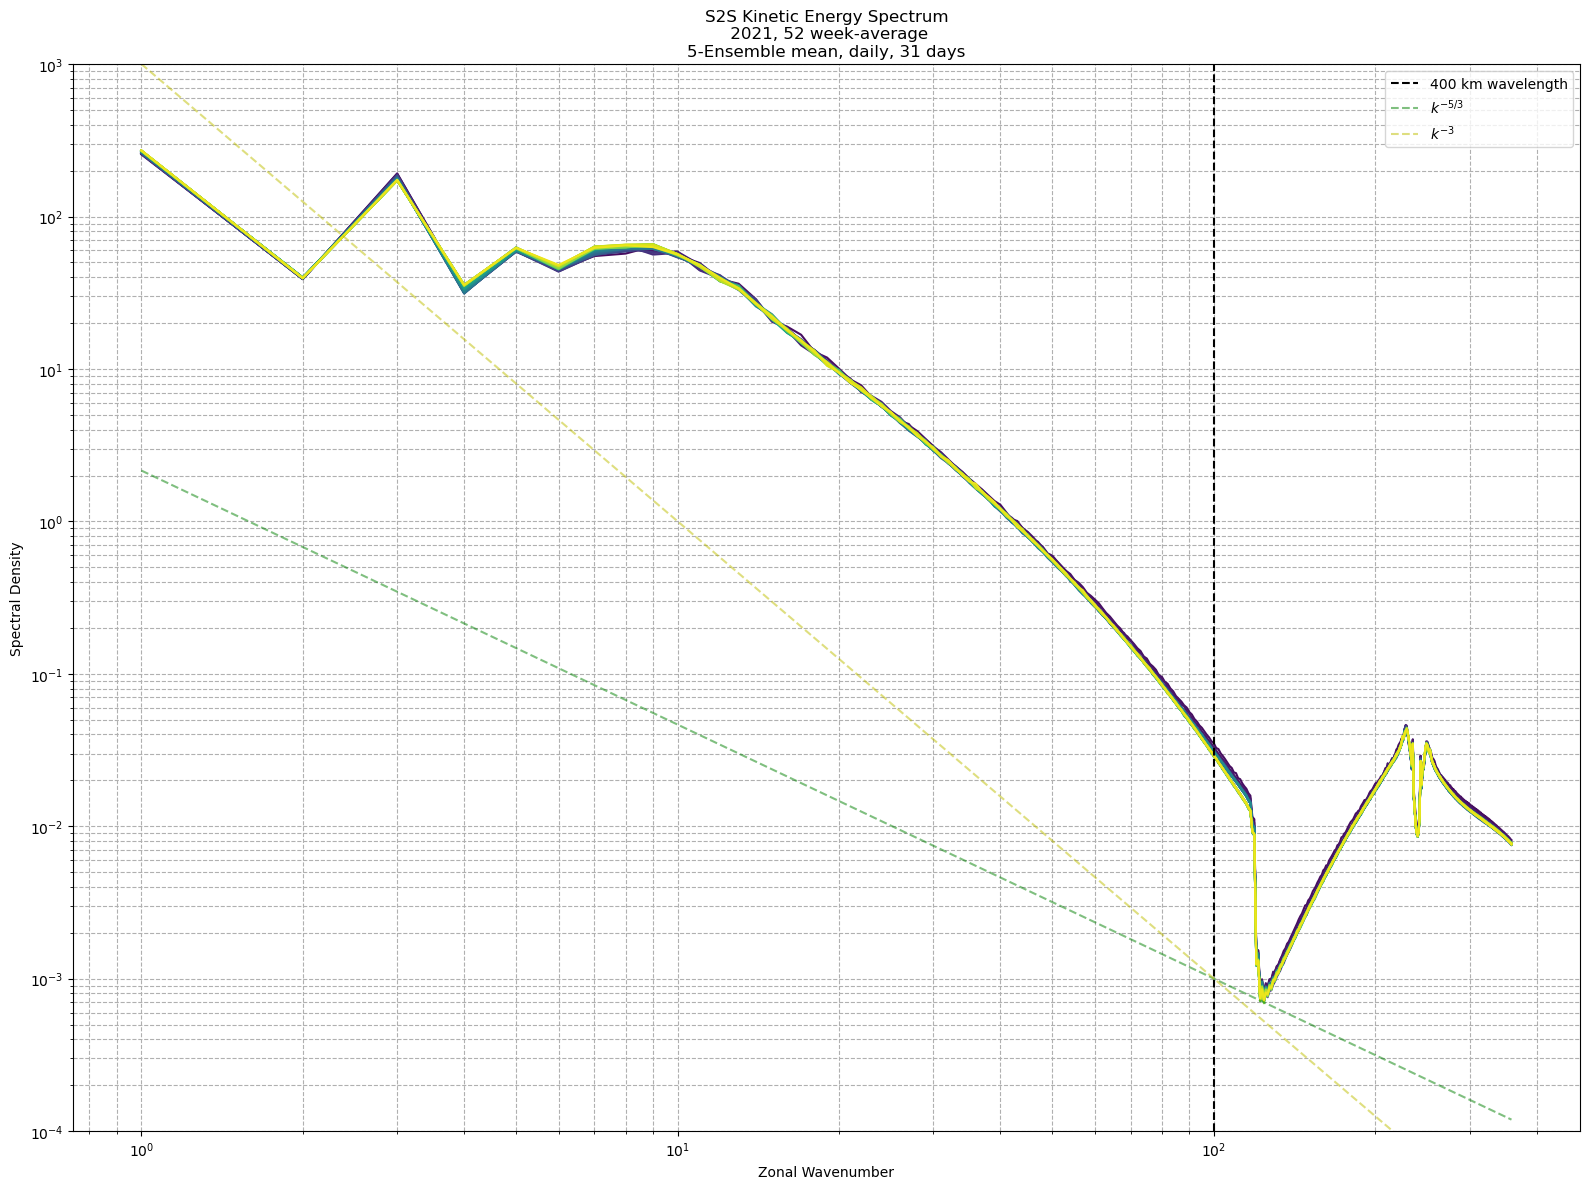

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import xarray as xr

plt.figure(figsize=(16, 12))



colors = sns.color_palette('viridis', 31)
models = sns.color_palette("hls", 6)

###################
# all ensembles
###################
# for i in range(1,2):
data = xr.open_dataset("/data/GC_output/analysis/NWP/S2S/2021/spectra.zarr").sel(level=300).mean("initial_time").mean("ensemble")
x = data['wavenumber']
for t in range(0, 31):
    spc = data['spectrum'].isel(time=t) #- data['spectrum'].isel(time=0)
    if t == 30:
        plt.loglog(x[1:], spc[1:], color=colors[t], alpha=1)
    else:
        plt.loglog(x[1:], spc[1:], color=colors[t])

##################
# 0th ensemble
##################
# data = xr.open_dataset(f"/data/GC_output/analysis/NWP/IFS-ENS/2021-06-21/spectra_3.nc")
# for t in range(0,60,2):
#     x = data['wavenumber']
#     spc = data['spectrum'].isel(level=0, time=t)
#     if t == 58:
#         plt.loglog(x[1:], spc[1:], color=colors[t])
#     else:
#         plt.loglog(x[1:], spc[1:], color=colors[t])
        
##################
# IFS-HRES
##################
# data = xr.open_zarr(f"/geodata2/S2S/DL/GC_output/2021/spectra.zarr")
# for t in range(0, 60):
#     x = data['wavenumber']
#     spc = data['spectrum'].isel(time=t).mean("initial_time")
#     if t == 59:
#         plt.loglog(x[1:], spc[1:], color=colors[t])
#     else:
#         plt.loglog(x[1:], spc[1:], color=colors[t])
# 1. 400km 파장에 해당하는 wavenumber에 수직선 추가
# zonal wavenumber index at wavelength 400km

# k = 2 * pi * circumference / wavelength
k_400 = 2*np.pi * 6371229/400000


plt.axvline(x=k_400, color='k', linestyle='--', label='400 km wavelength')

k_min = x[1].item()
k_max = x[-1].item()
k_vals = np.logspace(np.log10(k_min), np.log10(k_max), 100)

y_ref = 1e-3

A_5_3 = y_ref / (k_400 ** (-5/3))
trend_5_3 = A_5_3 * k_vals ** (-5/3)

A_3 = y_ref / (k_400 ** (-3))
trend_3 = A_3 * k_vals ** (-3)

plt.loglog(k_vals[:], trend_5_3[:], 'g--', label=r'$k^{-5/3}$', alpha=0.5)
plt.loglog(k_vals[:], trend_3[:], 'y--', label=r'$k^{-3}$', alpha=0.5)

plt.xlabel('Zonal Wavenumber')
plt.ylabel('Spectral Density')
plt.title('S2S Kinetic Energy Spectrum\n 2021, 52 week-average\n5-Ensemble mean, daily, 31 days')
plt.legend()
plt.grid(True, which='both', ls='--')
plt.ylim(1e-4, 1e3)
plt.tight_layout()
# plt.show()
plt.savefig("2021 S2S_KE.png")
